In [28]:
##  (-2;9)//	110//	1,25//	4	Скотта	// t-распределение Стьюдента  с числом степеней свободы k=7
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
import pandas as pd

from scipy.stats import norm

sigma = 3
a = -2
n_points = 1100

1

In [29]:
massiv = np.random.normal(a, sigma, n_points)
massiv.sort()
print(massiv)

[-11.24793705 -10.76617931 -10.32704268 ...   6.1192104    7.17752137
   7.20479439]


Text(0.5, 1.0, 'Гистограмма нормального распределения')

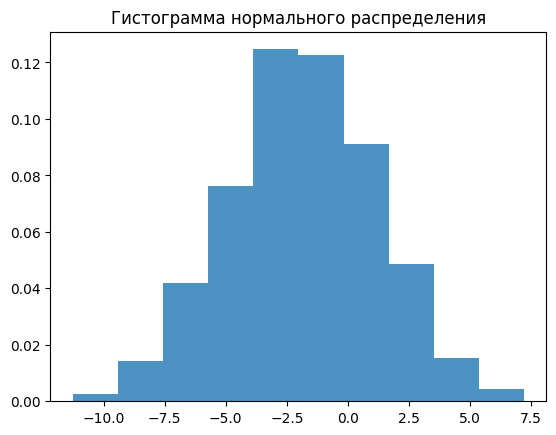

In [30]:
plt.hist(massiv, density=True, histtype='stepfilled', alpha=0.8)
plt.title('Гистограмма нормального распределения')

In [31]:
h = 3.5 * np.std(massiv) / (n_points ** (1 / 3))
k = int((max(massiv) - min(massiv)) / h)
print('h = ', h)
print('k = ', k)

h =  1.0257481090470064
k =  17


In [32]:
intervals = []
for i in range(int(k)):
    intervals.append([massiv.min() + h * i, massiv.min() + h * (i + 1)])
print('Количество интервалов: ', k)
print('Длина интервала: ', h)
print('Интервалы: ', intervals)
intervals_gist = []
for i in range(int(k)):
    intervals_gist.append(intervals[i][0])


Количество интервалов:  17
Длина интервала:  1.0257481090470064
Интервалы:  [[-11.247937053469144, -10.222188944422138], [-10.222188944422138, -9.196440835375132], [-9.196440835375132, -8.170692726328124], [-8.170692726328124, -7.144944617281118], [-7.144944617281118, -6.119196508234112], [-6.119196508234112, -5.093448399187105], [-5.093448399187105, -4.067700290140099], [-4.067700290140099, -3.0419521810930927], [-3.0419521810930927, -2.0162040720460865], [-2.0162040720460865, -0.9904559629990803], [-0.9904559629990803, 0.035292146047925854], [0.035292146047925854, 1.0610402550949338], [1.0610402550949338, 2.08678836414194], [2.08678836414194, 3.112536473188946], [3.112536473188946, 4.138284582235952], [4.138284582235952, 5.164032691282959], [5.164032691282959, 6.189780800329967]]


Количество интервалов:  17
Длина интервала:  1.0257481090470064
Интервалы:  [[-11.247937053469144, -10.222188944422138], [-10.222188944422138, -9.196440835375132], [-9.196440835375132, -8.170692726328124], [-8.170692726328124, -7.144944617281118], [-7.144944617281118, -6.119196508234112], [-6.119196508234112, -5.093448399187105], [-5.093448399187105, -4.067700290140099], [-4.067700290140099, -3.0419521810930927], [-3.0419521810930927, -2.0162040720460865], [-2.0162040720460865, -0.9904559629990803], [-0.9904559629990803, 0.035292146047925854], [0.035292146047925854, 1.0610402550949338], [1.0610402550949338, 2.08678836414194], [2.08678836414194, 3.112536473188946], [3.112536473188946, 4.138284582235952], [4.138284582235952, 5.164032691282959], [5.164032691282959, 6.189780800329967]]
Абсолютные частоты:  (-11.266, -10.162]      4
(-10.162, -9.077]       3
(-9.077, -7.992]       17
(-7.992, -6.906]       27
(-6.906, -5.821]       58
(-5.821, -4.735]       78
(-4.735, -3.65]       113
(-3.

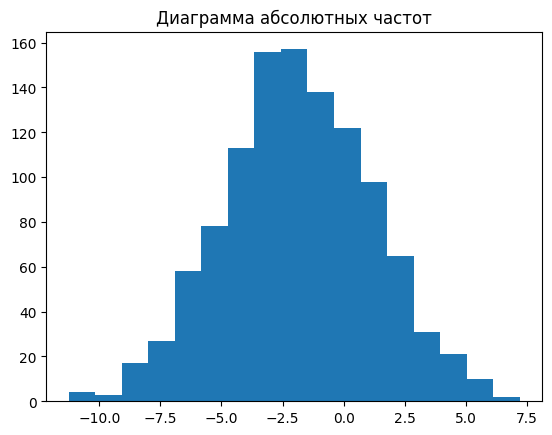

In [33]:
## абсолютные частоты в интервалах группировки
abs_freq = 0.0
print('Количество интервалов: ', k)
print('Длина интервала: ', h)
print('Интервалы: ', intervals)
## вычисление абсолютных частот
abs_freq =  pd.cut(massiv, bins=k).value_counts()
print('Абсолютные частоты: ', abs_freq)
sum_abs_freq = 0
for i in abs_freq:
     sum_abs_freq += i
print('Сумма абсолютных частот: ', sum_abs_freq)
## построение диаграммы абсолютных частот
plt.hist(massiv, bins=k)
plt.title('Диаграмма абсолютных частот')
plt.show()

Количество интервалов:  17
Длина интервала:  1.0257481090470064
Интервалы:  [[-11.247937053469144, -10.222188944422138], [-10.222188944422138, -9.196440835375132], [-9.196440835375132, -8.170692726328124], [-8.170692726328124, -7.144944617281118], [-7.144944617281118, -6.119196508234112], [-6.119196508234112, -5.093448399187105], [-5.093448399187105, -4.067700290140099], [-4.067700290140099, -3.0419521810930927], [-3.0419521810930927, -2.0162040720460865], [-2.0162040720460865, -0.9904559629990803], [-0.9904559629990803, 0.035292146047925854], [0.035292146047925854, 1.0610402550949338], [1.0610402550949338, 2.08678836414194], [2.08678836414194, 3.112536473188946], [3.112536473188946, 4.138284582235952], [4.138284582235952, 5.164032691282959], [5.164032691282959, 6.189780800329967]]
Относительные частоты:  [0.0036363636363636364, 0.0027272727272727275, 0.015454545454545455, 0.024545454545454544, 0.05272727272727273, 0.07090909090909091, 0.10272727272727272, 0.14181818181818182, 0.142727

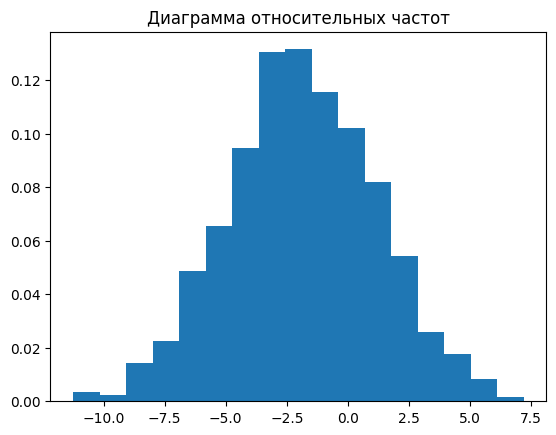

In [34]:
rel_freq = []
print('Количество интервалов: ', k)
print('Длина интервала: ', h)
print('Интервалы: ', intervals)
## вычисление относительных частот
for i in abs_freq:
    rel_freq.append(i/n_points)
print('Относительные частоты: ', rel_freq)
## сумма относительных частот
sum_rel_freq = 0
for i in rel_freq:
    sum_rel_freq += i
print('Сумма относительных частот: ', sum_rel_freq)
## построение диаграммы относительных частот
plt.hist(massiv, bins=k, density=True)
plt.title('Диаграмма относительных частот')
plt.show()

2

Относительные частоты:  [0.0036363636363636364, 0.0027272727272727275, 0.015454545454545455, 0.024545454545454544, 0.05272727272727273, 0.07090909090909091, 0.10272727272727272, 0.14181818181818182, 0.14272727272727273, 0.12545454545454546, 0.11090909090909092, 0.0890909090909091, 0.05909090909090909, 0.028181818181818183, 0.019090909090909092, 0.00909090909090909, 0.0018181818181818182]


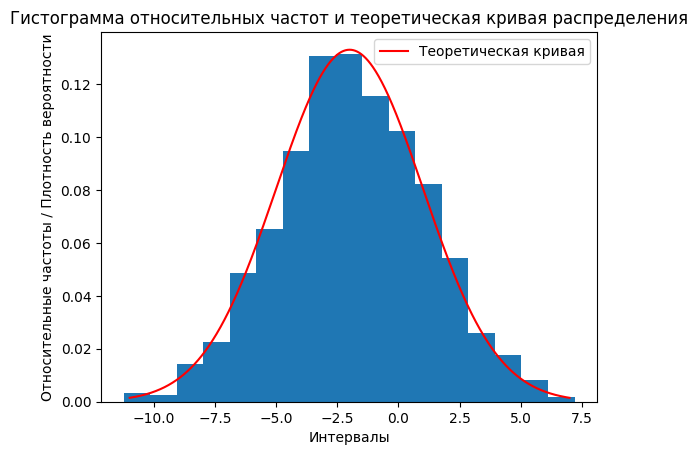

In [35]:
rel_freq = []
## вычисление относительных частот
for i in abs_freq:
    rel_freq.append(i/n_points)
print('Относительные частоты: ', rel_freq)
#plt.bar(intervals_gist, rel_freq, width=h, align='edge')
plt.hist(massiv, bins=k, density=True)
#plt.hist(massiv, bins=30, density=True, alpha=0.5, color='b', label='Гистограмма относительных частот')

x = np.linspace(a - 3 * sigma, a + 3 * sigma, n_points)
## плотность распределения
y = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-(x - a) ** 2 / (2 * sigma ** 2))
plt.plot(x, y, color='red', label='Теоретическая кривая')
plt.xlabel('Интервалы')
plt.ylabel('Относительные частоты / Плотность вероятности')
plt.title('Гистограмма относительных частот и теоретическая кривая распределения')
plt.legend()
plt.show()
plt.show()

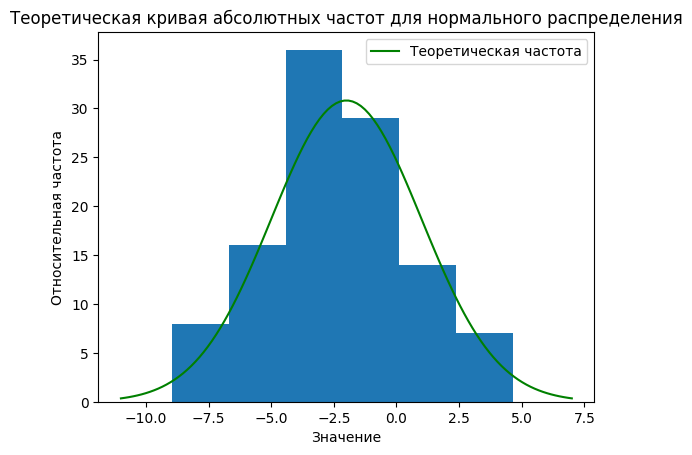

In [10]:
## вычисление абсолютных частот
abs_freq =  pd.cut(massiv, bins=k).value_counts()

#plt.bar(intervals_gist, abs_freq, width=h, align='edge')
plt.hist(massiv, bins=k)
plt.title('Гистограмма абсолютных частот')
## теоретическая частота распределения случайной величины X
x = np.linspace(a - 3 * sigma, a + 3 * sigma, n_points)
y1 = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-(x - a) ** 2 / (2 * sigma ** 2))
y = (h * n_points * y1)
plt.plot(x, y, color='green', label='Теоретическая частота')
plt.xlabel('Интервалы')
plt.xlabel('Значение')
plt.ylabel('Относительная частота')
plt.title('Теоретическая кривая абсолютных частот для нормального распределения')
plt.legend()
plt.show()
plt.show()


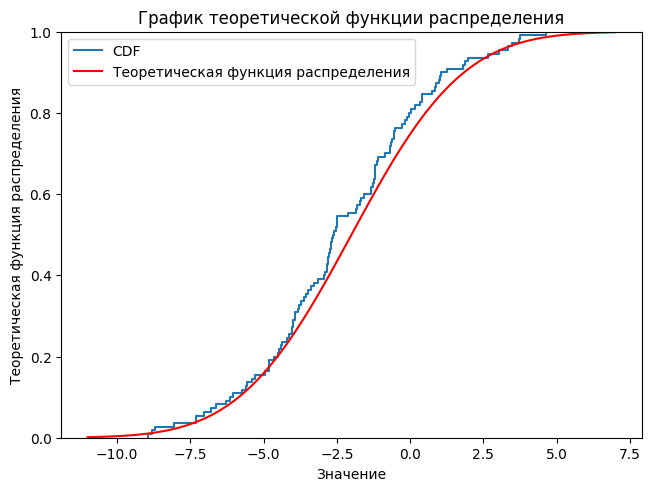

In [11]:
fig = plt.figure(layout="constrained")
axs = fig.subplots(1, 1, sharex=True, sharey=True)
axs.ecdf(massiv, label="CDF")

##график теоретической функции распределения
x = np.linspace(a - 3 * sigma, a + 3 * sigma, n_points)
y = norm.cdf(x, a, sigma)
plt.plot(x, y, color='red', label='Теоретическая функция распределения')
plt.xlabel('Значение')
plt.ylabel('Теоретическая функция распределения')
plt.title('График теоретической функции распределения')
plt.legend()
plt.show()


             X
0.25 -4.106113
0.50 -2.621956
0.75 -0.542088


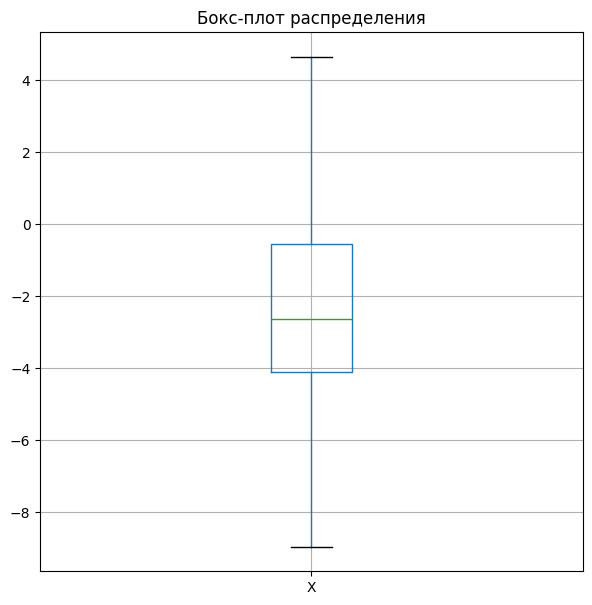

In [12]:
data_frame = DataFrame(data=massiv, columns=['X'])
data_frame.boxplot(figsize=(7, 7))
data_frame.quantile([0.25, 0.5, 0.75])
print(data_frame.quantile([0.25, 0.5, 0.75]))
plt.title('Бокс-плот распределения')
plt.show()

3

In [13]:
# вычисление "вручную"
q = 1.25
# Находим по таблице значение x = 1.25 и по св-ву интегралов суммируем его самим с собой
print("Вероятность, сделанная \"вручную\": ", 0.3944 * 2)
# вычисление с помощью питона
print("Вероятность по lib", sts.norm().cdf(q) - sts.norm().cdf(-q))

# оценка вероятности *
satisfying_values = 0
# найдем все значения выборки, подходящие по усл-ю
for i in massiv:
     if abs(i - a) < q * sigma:
        satisfying_values += 1
# найдем отн. частоту
rel_freq = satisfying_values / n_points
print("Статистическая", rel_freq)
# увеличив выборку в 50 раз, точность оценки вероятности увеличится, потому что гистограмма более совпадает с теоретической кривой(в силу збч)

Вероятность, сделанная "вручную":  0.7888
Вероятность по lib 0.7887004526662893
Статистическая 0.8


4

In [14]:
mean = np.mean(massiv)
print(mean)
sum = 0
for i in massiv:
    sum += i
print(sum / len(massiv))

-2.3412516526124474
-2.341251652612446


In [15]:
variance = np.var(massiv, ddof=0)
print(variance)
sum = 0
for i in massiv:
    sum += (i - mean) ** 2
print(sum / (len(massiv) - 1))

8.314842483282593
8.39112544184482


In [16]:
std_deviation = np.sqrt(variance)
print(std_deviation)
sum = 0
for i in massiv:
    sum += (i - mean) ** 2
print(math.sqrt(sum / (len(massiv) - 1)))


2.883546858173557
2.8967439379145716


In [17]:
# Коэффициент асимметрии
skewness = sts.skew(massiv)
print(skewness)
skewness_1 = (np.sum((massiv - mean) ** 3) * len(massiv)) / ((len(massiv) - 1) * (len(massiv) - 2) * std_deviation**3)
print(skewness_1)


0.03868685051152387
0.03976477159271487


In [20]:
# Коэффициент эксцесса
kurtosis = sts.kurtosis(massiv)
print(kurtosis)

kurtosis_1 = ((np.sum((massiv - mean) ** 4) * len(massiv)) / ((len(massiv) - 1) * (len(massiv) - 2) * (len(massiv) - 3) * std_deviation**4) - 3 * ((len(massiv) - 1)**2) / ((len(massiv) - 2) * (len(massiv) - 3)))
print(kurtosis)


-0.19630753411344815
-0.19630753411344815


In [19]:
median = np.median(massiv)
print(median)

n = len(massiv)

if n % 2 == 0:
    # Если количество элементов четное, медиана - среднее двух средних элементов
    median_1 = (massiv[n // 2 - 1] + massiv[n // 2]) / 2
else:
    # Если количество элементов нечетное, медиана - средний элемент
    median_1 = massiv[n // 2]
print(median_1)


-2.621955885869282
-2.621955885869282
